In [1]:
import numpy as np
import torch
import torch.utils.data
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm_notebook as tqdm
import pickle
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import pickle
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [14]:
with open('../data/hw2_q2.pkl', 'rb') as f:
    dataset = pickle.load(f)
data_train, data_test = dataset['train'], dataset['test']
print(len(data_train), len(data_test))

20000 6838


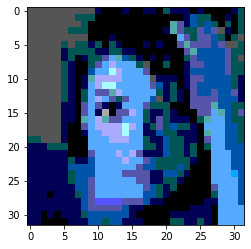

In [19]:
plt.imshow(data_train[91] * 85)

In [ ]:
class ResNetBlock(nn.Module):
    def __init__(self, c):
        super(ResNetBlock, self).__init__()
        self.layers = nn.Sequential(nn.ReLU(),
            nn.Conv2d(2 * c, c, 1, stride=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(c, c, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(c, 2 * c, 1, stride=1, padding=0)
        )

    def forward(self, x):
        x1 = self.layers(x)
        return x + x1
    

class ResNet(nn.Module):
    def __init__(self, n_blocks, c):
        super(ResNet, self).__init__()
        layers = [nn.Conv2d(3, 2 * c, 7, stride=1, padding=3)]
        for _ in range(n_blocks):
            layers.append(ResNetBLock(c))
        
        layers.append(nn.ReLU())
        layers.append(nn.Conv2d(2 * c, 6, 1, stride=1, padding=0))
        self.layers = nn.Sequentional(*layers)
        
    def forward(self, x):
        return self.layers(x)

In [ ]:
class AffineCoupling(nn.Module):
    def __init__(self, n_blocks=8, c=32):
        super(AffineCoupling, self).__init__()
        self.res_net = ResNet(n_blocks, c)
        
    
    def forward(self, x1, x2):
        y1 = x1
        log_s, t = torch.split(self.res_net(x1), 2, axis=-1)
        y2 = torch.exp(log_s) * (y1 + t)
        return y1, y2

In [ ]:
class FlowModel(nn.Module):
    def __init__(self):
        super(FlowModel, self).__init__()
        self.affine_coupling = AffineCoupling()
    
    def check_board_split(self, x):
        
        
    
    def channel_split(self, x):
        return torch.split(self.res_net(x), 2, axis=-1)
        
    def squeeze(self, x):
        b, w, h, c = x.shape
        return x.reshape(b, w / 2 , h / 2, c * 4)
        
    def inverse(self, x1, x2):
        return torch.cat((x1, x2), dim=-1)
    
    def forward(self, x):
        

In [ ]:
BATCH_SIZE = 32
dataset_train = torch.utils.data.DataLoader(
    dataset=data_train,
    batch_size=BATCH_SIZE,
    shuffle=True
)
dataset_test = torch.utils.data.DataLoader(
    dataset=data_test,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [ ]:
criterion = nn.CrossEntropyLoss()
model = FlowModel().to(device)
optimizer = torch.optim.Adam(params=model.parameters())

# import wandb
# wandb.init(project="hw2-2")
# wandb.watch(model)

In [20]:
data_train.shape

(20000, 32, 32, 3)